# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
# Astonishingly there seems to be no clean way to set up the Python path automatically for a script that does not
# reside in the root folder. This will need to be added to all notebooks unless a better solution comes along.
import os, sys
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL

from datasets.mini_imagenet import MiniImageNet, Split
from datasets.omniimage import OmniImage
from datasets.utils import extract_archive

# Load Data

In [63]:
# ds = MiniImageNet("../../data/mini-imagenet", Split.VAL, download=True)
ds = OmniImage("../../data/omniimage", num_images_per_class=100, split="train", normalize=False, download=True)

516606825it [00:28, 18095330.29it/s]


The MD5 checksum of the download file ../../data/omniimage/OmnImage84_100.zip does MATCH the one on record.
Extracting ../../data/omniimage/OmnImage84_100.zip to ../../data/omniimage


# Data Statistics

train Set statistics:
700 classes
70000 examples


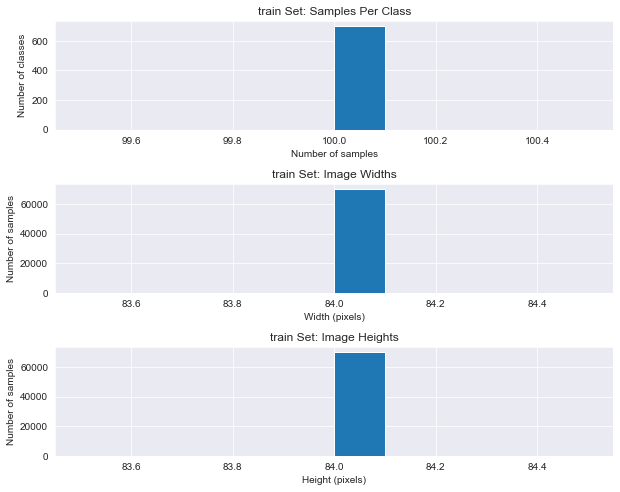

In [64]:
from collections import defaultdict


def show_image_classification_dataset_stats(name, dataset):
    """
    Show statistics for an image classification dataset.
    
    Args:
        name (str): Display name of the dataset, like "Training" or "Validation".
        dataset (Dataset): A PyTorch dataset object that returns (image, target) pairs, where target is a class index.
    """
    title = name + " Set"
    print(f"Collecting {title} statistics...", end=" ", flush=True)
    widths = []
    heights = []
    class_map = defaultdict(int)
    for img, label in dataset:
        class_map[int(label)] += 1
        if isinstance(img, PIL.Image.Image):
            widths.append(img.width)
            heights.append(img.height)
        else:
            widths.append(img.size()[-1])
            heights.append(img.size()[-2])
    class_sizes = list(class_map.values())
    print("done.")

    print(title, "statistics:")
    print(len(class_map), "classes")
    print(len(dataset), "examples")

    fig, (sax, wax, hax) = plt.subplots(3, figsize=(10, 8), gridspec_kw={"hspace": 0.5})
    sax.hist(class_sizes)
    sax.set_xlabel("Number of samples")
    sax.set_ylabel("Number of classes")
    sax.set_title(f"{title}: Samples Per Class")

    wax.hist(widths)
    wax.set_xlabel("Width (pixels)")
    wax.set_ylabel("Number of samples")
    wax.set_title(f"{title}: Image Widths")

    hax.hist(heights)
    hax.set_xlabel("Height (pixels)")
    hax.set_ylabel("Number of samples")
    hax.set_title(f"{title}: Image Heights")

    
show_image_classification_dataset_stats(str(ds.split), ds)

# Visualization

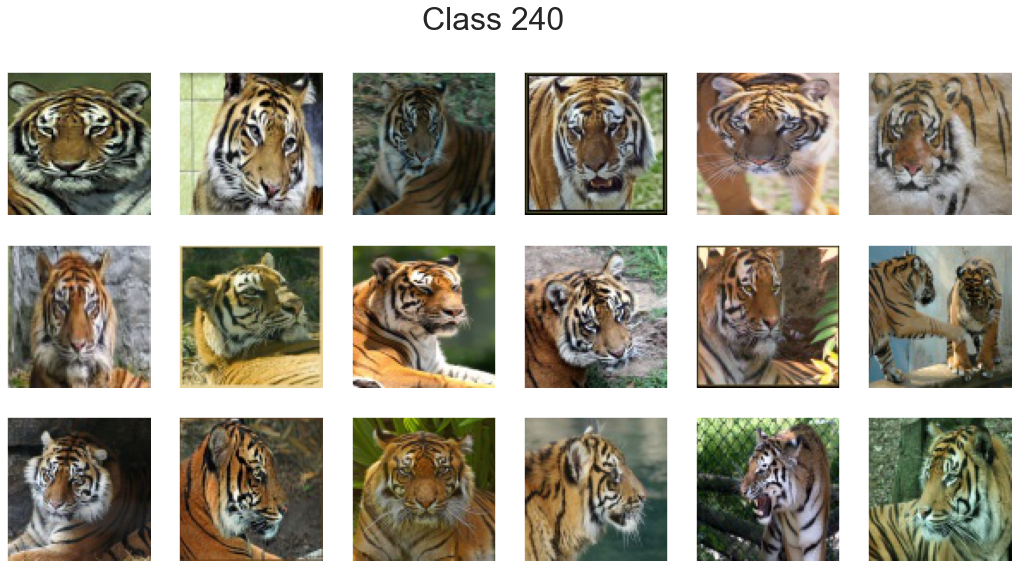

In [76]:
# Randomly sample from a random class and display the samples.
# NOTE: Assumes a dataset of type ClassIndexedDataset.
rows = 3
cols = 6
rng = np.random.default_rng()
indices = rng.choice(rng.choice(ds.class_index), size=rows*cols, replace=False)
samples = [ds[i] for i in indices]

fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
fig.suptitle(f"Class {int(samples[0][1])}", fontsize=32)
for i, (img, _) in enumerate(samples):
    ax = axs[i//cols - 1, i%cols]
    if not isinstance(img, PIL.Image.Image):  # if not image, then must be array-like
        img = img.squeeze()  # if this is a "batch" of one, remove the batch dimension.
        if len(img.shape) == 3:
            # Has channels. Rearrange to be [H, W, C].
            img = img.permute(1, 2, 0)
    # cmap will be ignored if data is RGB(A) format, so this is compatible with both single- and multi-channel images.
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)